#**Exploratory Data Analysis (EDA)**
---

#Import Required Libraries







In [1]:
pip install diagnostics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
from torch import nn, optim

from torchvision import datasets, transforms, models
import os
import numpy as np
from PIL import Image
import pandas as pd
import dask.bag as bag
import diagnostics
from diagnostics import exception_hook

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
acne_dir = "/content/drive/MyDrive/Datathon 2022/Dataset/Acne"
melanoma_dir = "/content/drive/MyDrive/Datathon 2022/Dataset/Melanoma"
monkeypox_dir = "/content/drive/MyDrive/Datathon 2022/Dataset/Monkeypox"
normal_skin_dir = "/content/drive/MyDrive/Datathon 2022/Dataset/Normal skin"
cyst_tumour_skin_dir = "/content/drive/MyDrive/Datathon 2022/Dataset/Cyst, tumour and skin-tags"

#No. of Images by Class

In [5]:
class_examples = {
  'Acne': len(os.listdir(acne_dir)),
  'Melanoma': len(os.listdir(melanoma_dir)),
  'Monkeypox': len(os.listdir(monkeypox_dir)),
  'Normal Skin': len(os.listdir(normal_skin_dir)),
  'Cyst, Tumour & Skin Tags': len(os.listdir(cyst_tumour_skin_dir))
}

class_examples

{'Acne': 400,
 'Melanoma': 600,
 'Monkeypox': 700,
 'Normal Skin': 700,
 'Cyst, Tumour & Skin Tags': 600}

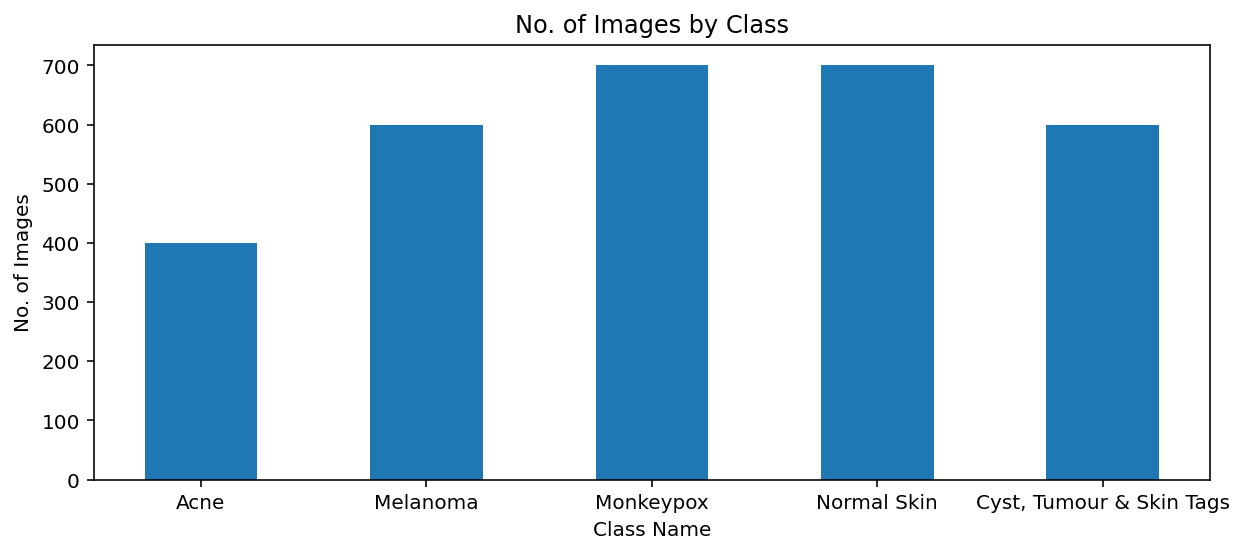

In [6]:
plt.figure().set_figwidth(10)
plt.bar(class_examples.keys(), class_examples.values(), width = 0.5);
plt.title("No. of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('No. of Images');

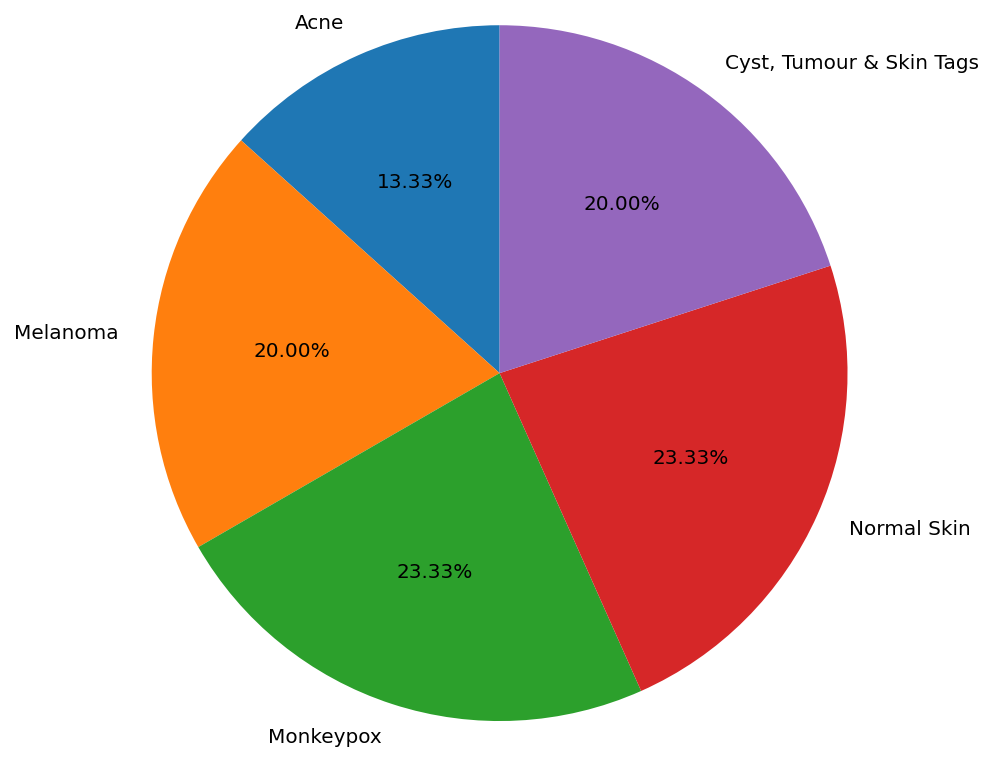

In [7]:
plt.pie(
    [class_examples["Acne"], class_examples["Melanoma"], class_examples["Monkeypox"], class_examples["Normal Skin"], class_examples["Cyst, Tumour & Skin Tags"]],
    startangle = 90,
    # explode=[0.05, 0.05, 0.05, 0.05, 0.05],
    autopct = '%0.2f%%',
    labels = ["Acne", "Melanoma" , "Monkeypox", "Normal Skin", "Cyst, Tumour & Skin Tags"],
    radius = 2
  )
# plt.title("No. of Images by Class as a Percentage");
plt.show()

#Image Resolutions in Pixels

In [8]:
def get_dims(file):   # Returns dimenstions for an RGB image
  im = Image.open(file)
  arr = np.array(im)
  h,w,d = arr.shape
  return h,w

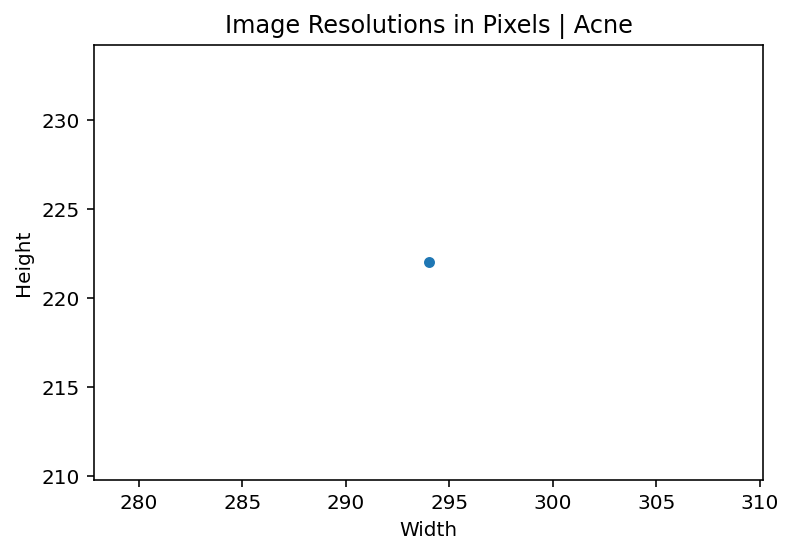

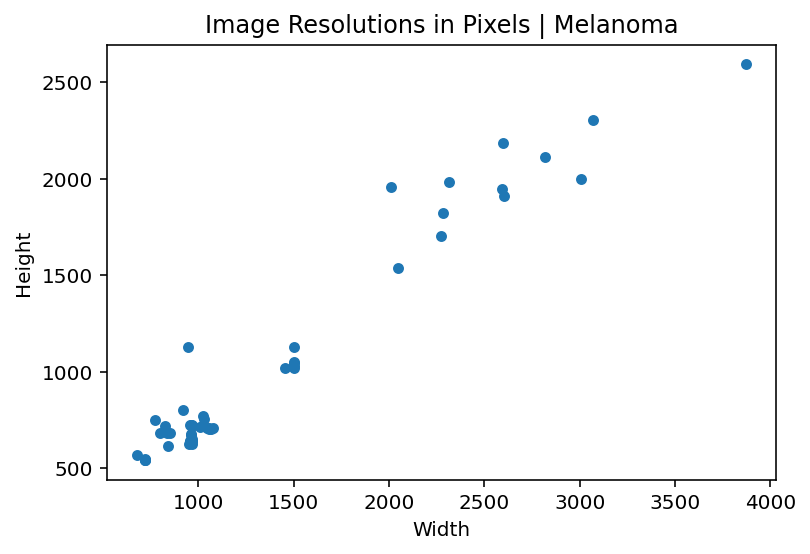

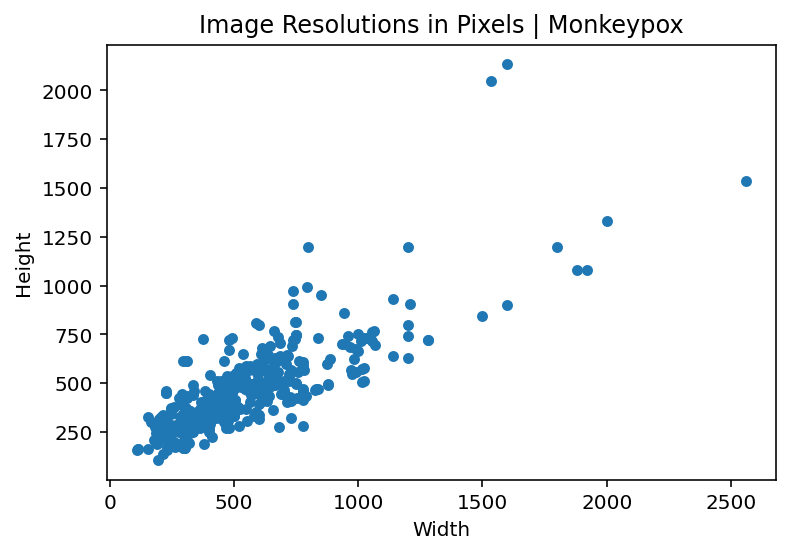

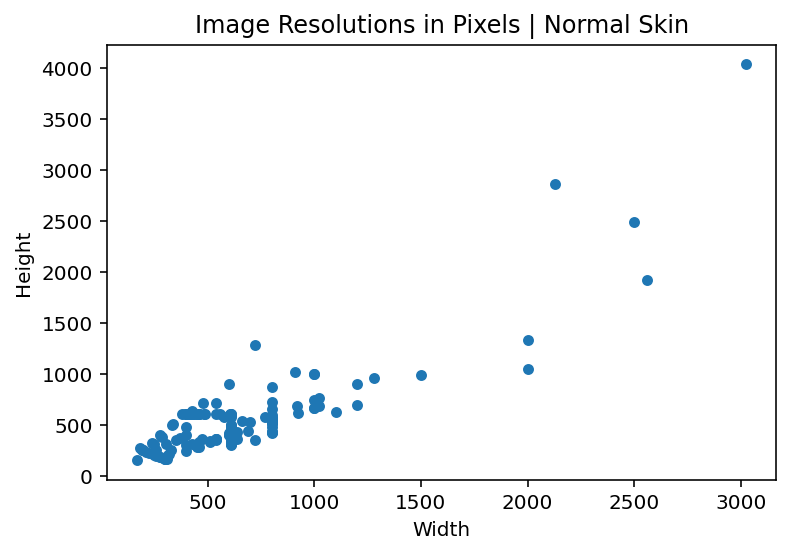

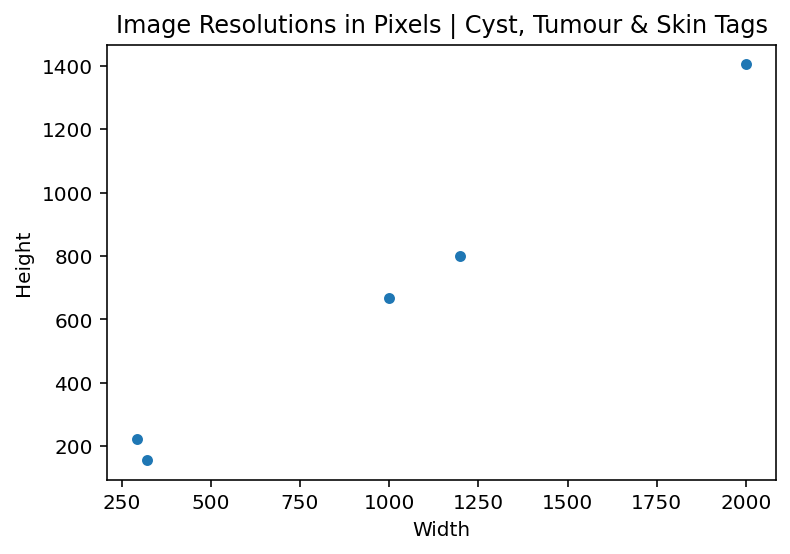

In [9]:
class_directories = {
  'Acne': acne_dir,
  'Melanoma': melanoma_dir,
  'Monkeypox': monkeypox_dir,
  'Normal Skin': normal_skin_dir,
  'Cyst, Tumour & Skin Tags': cyst_tumour_skin_dir
}

for n,d in class_directories.items():
  filepath = d
  filelist = [filepath + "/"+ f for f in os.listdir(filepath)]
  dims = bag.from_sequence(filelist).map(get_dims)
  # with diagnostics.ProgressBar():
  dims = dims.compute()
  dim_df = pd.DataFrame(dims, columns=['Height', 'Width'])
  sizes = dim_df.groupby(['Height', 'Width']).size().reset_index().rename(columns={0:'count'})
  sizes.plot.scatter(x='Width', y='Height');
  plt.title('Image Resolutions in Pixels | {}'.format(n))

In [10]:
def show_images(n,d):    # Returns 8 images
  nrows = 4
  ncols = 4
  fig = plt.gcf()
  fig.set_size_inches(ncols * 4, nrows * 4)
  filepath = d

  for i, f in enumerate(os.listdir(filepath)[:8]):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(filepath + "/"+ f)
    plt.imshow(img)
  plt.show()

#Acne

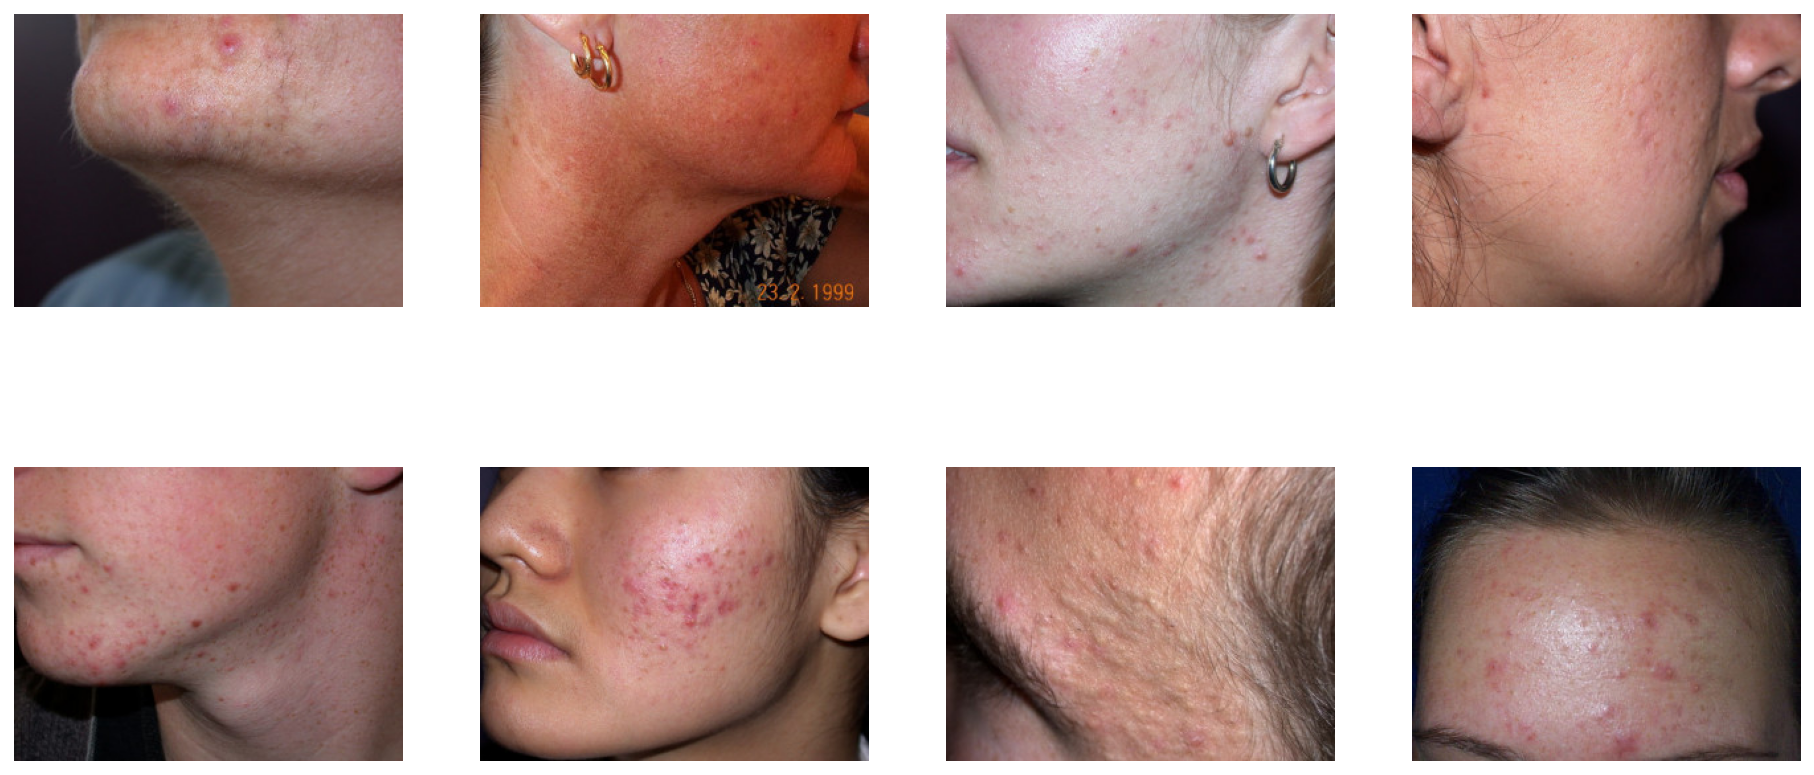

In [11]:
show_images("Acne", class_directories["Acne"])

#Melanoma

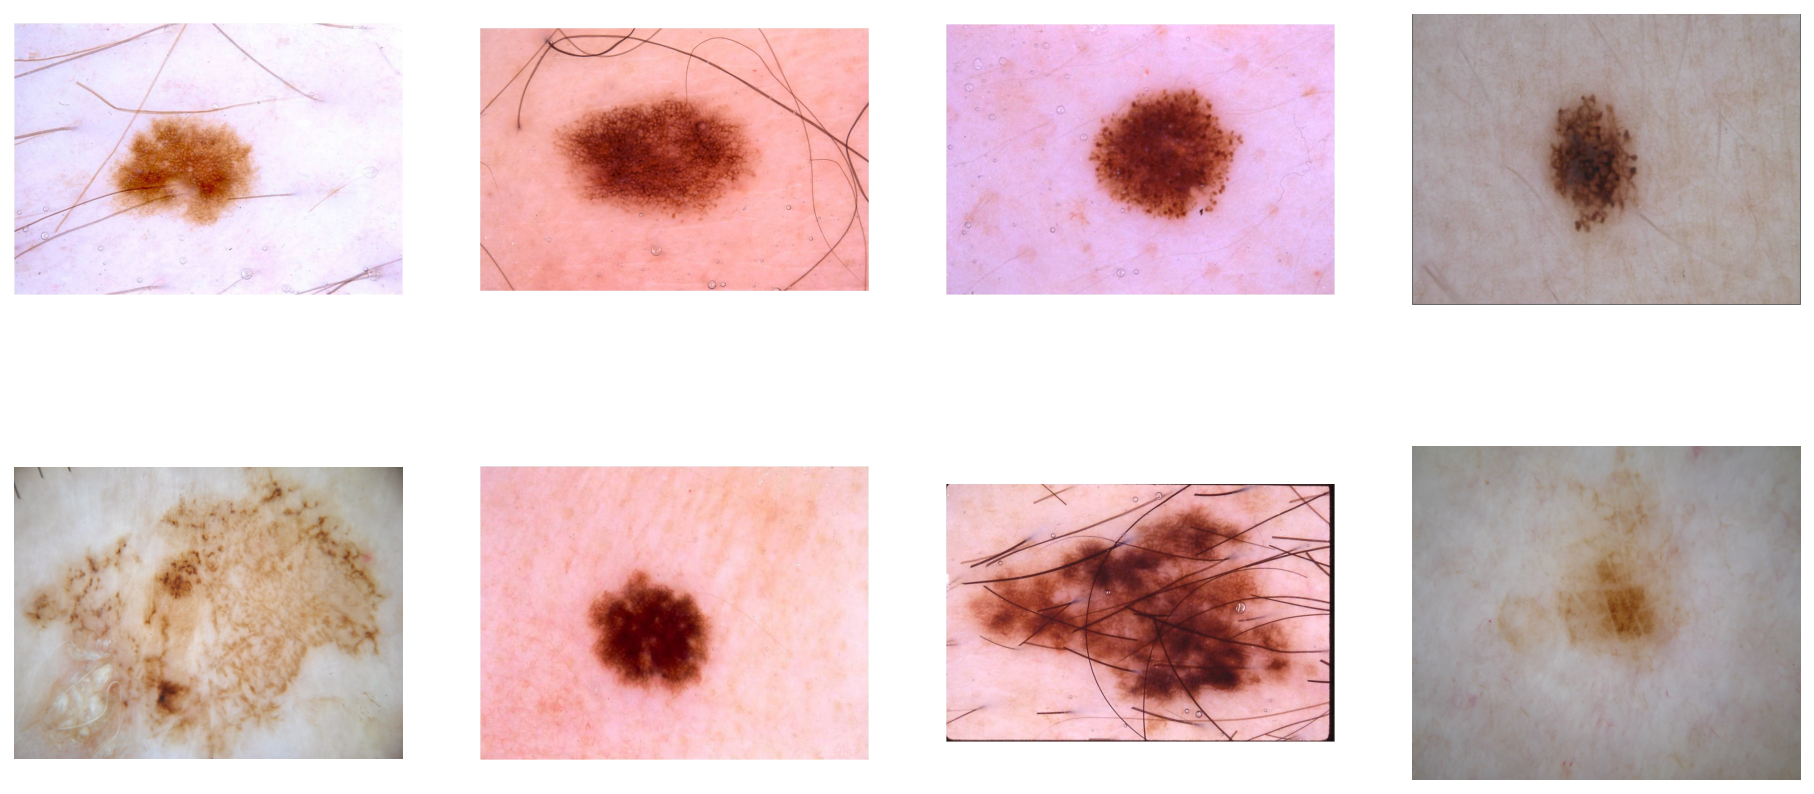

In [12]:
show_images("Melanoma", class_directories["Melanoma"])

#Monkeypox

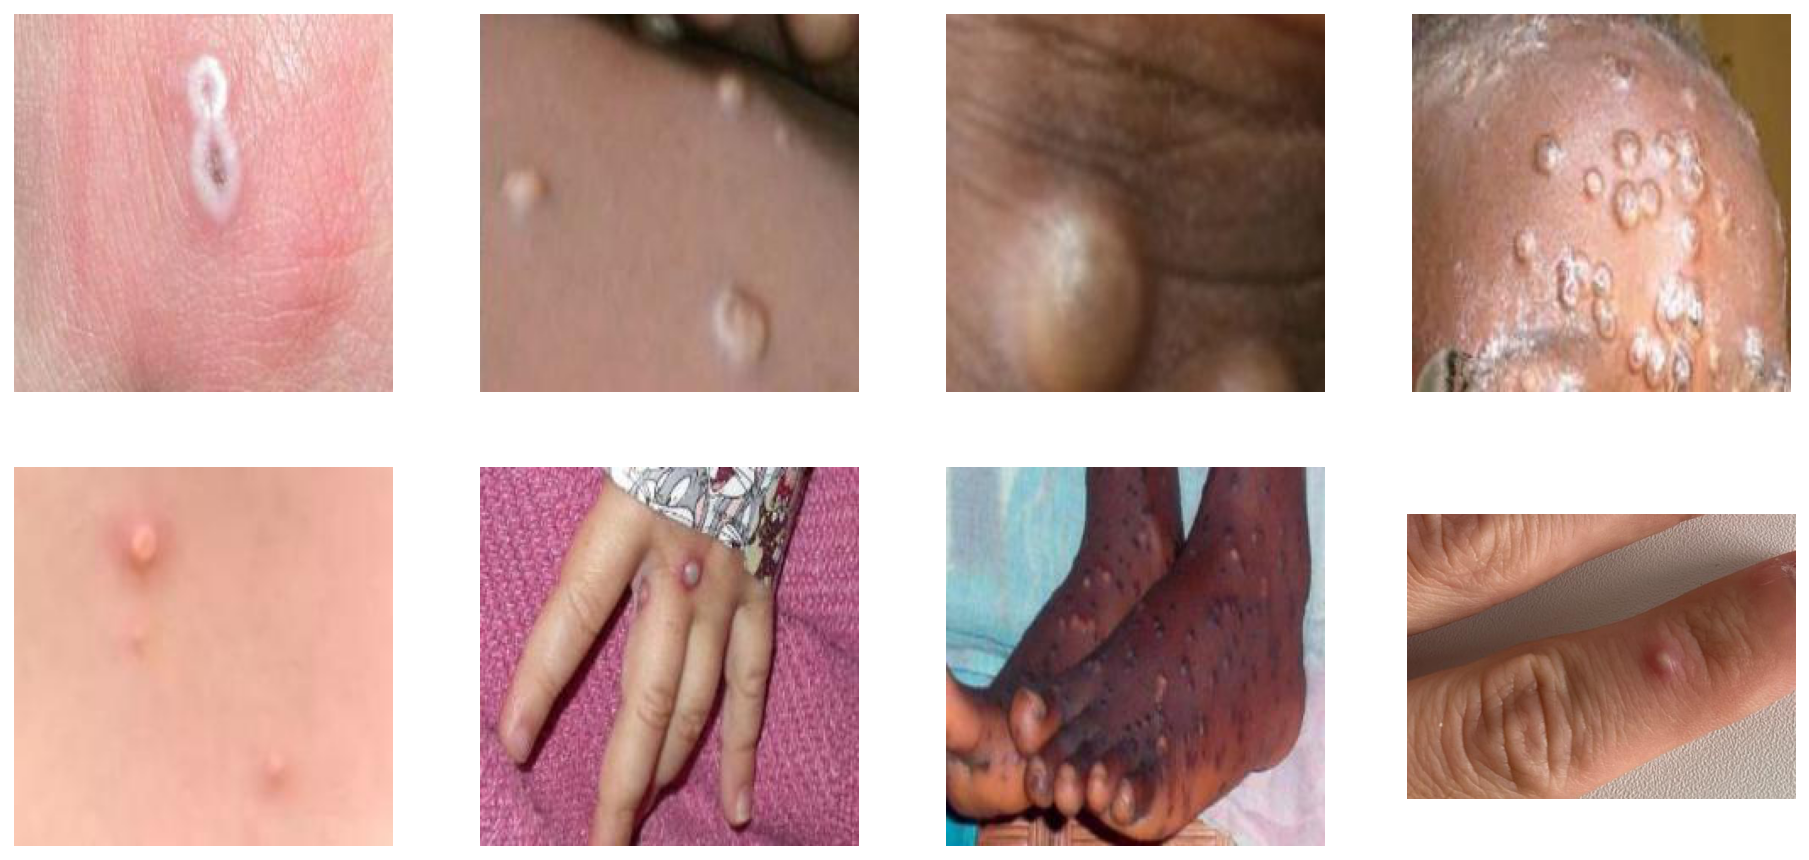

In [13]:
show_images("Monkeypox", class_directories["Monkeypox"])

#Normal Skin

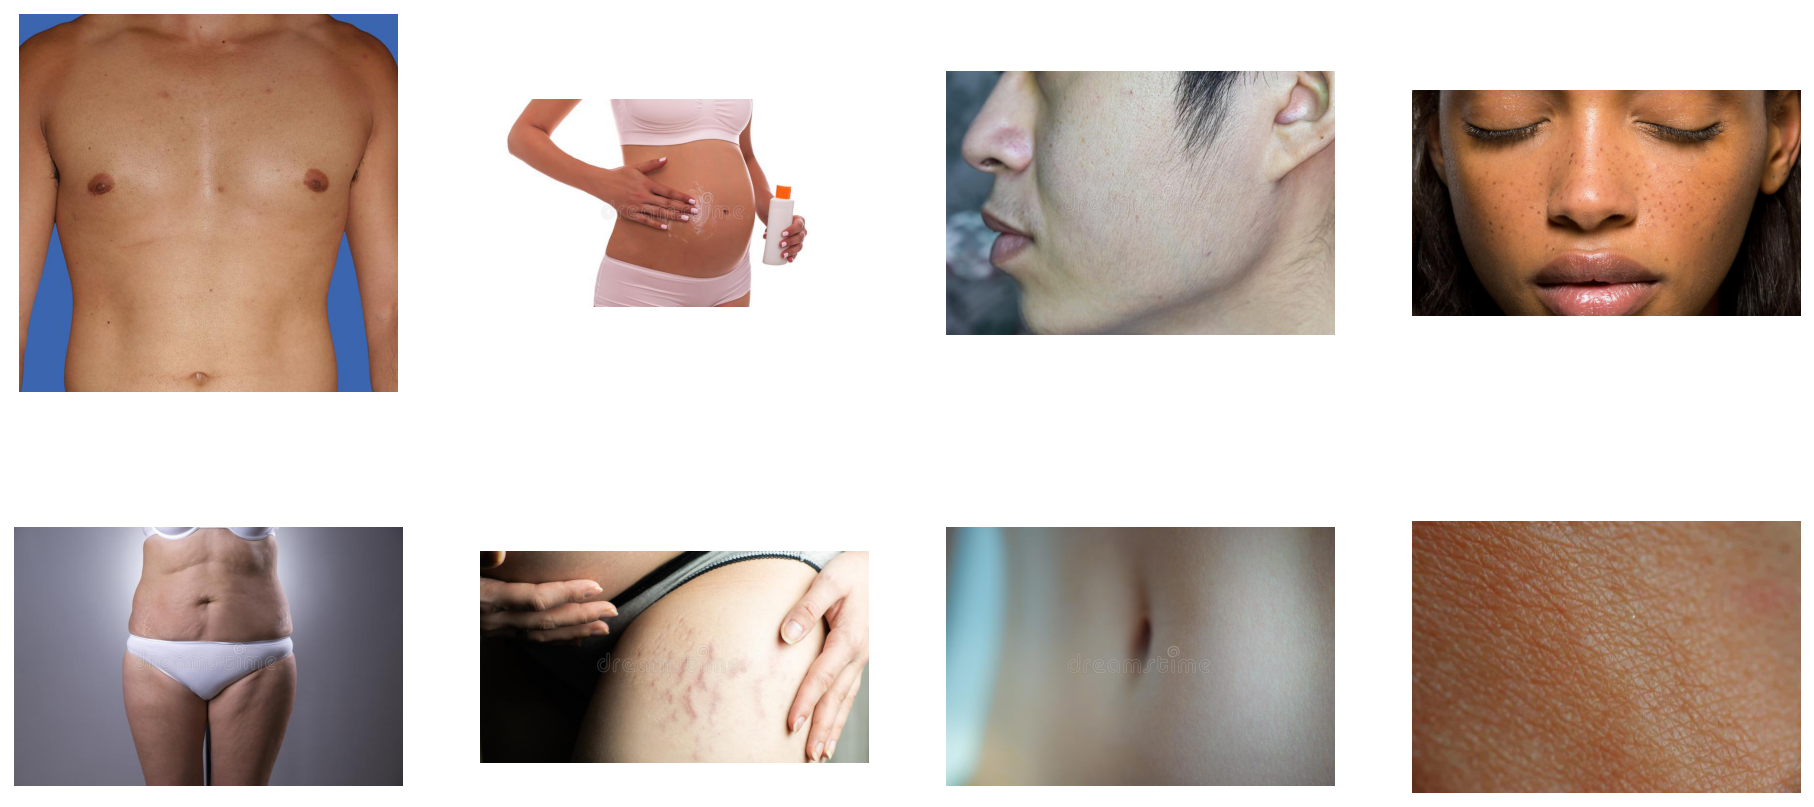

In [14]:
show_images("Normal Skin", class_directories["Normal Skin"])

#Cyst, Tumour & Skin Tags

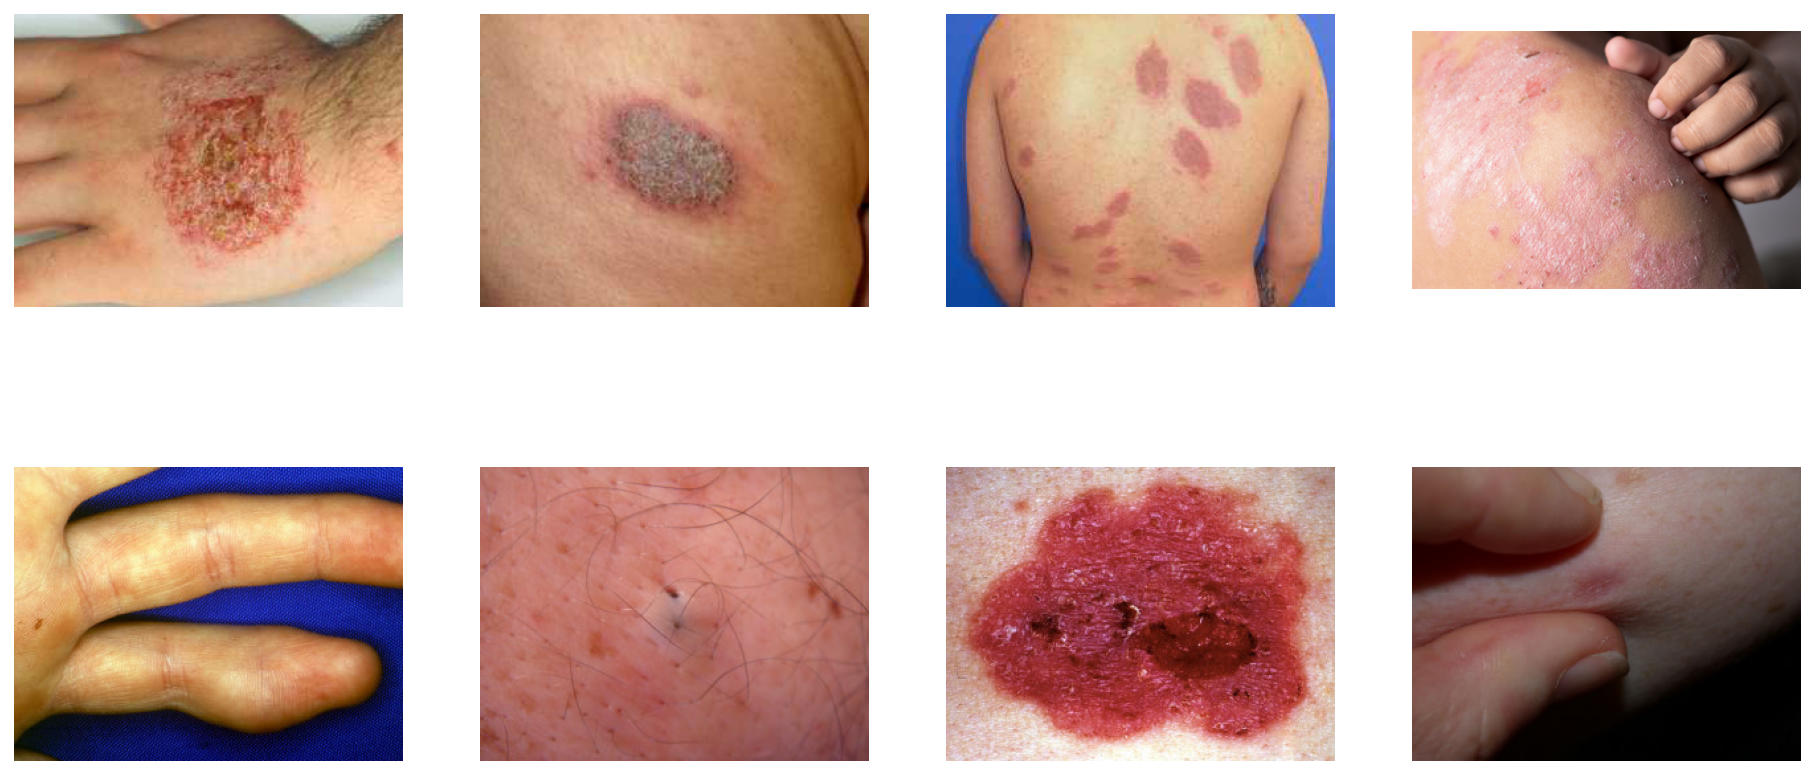

In [15]:
show_images("Cyst, Tumour & Skin Tags", class_directories["Cyst, Tumour & Skin Tags"])